# **EDA(1주차 세션)**

해당 데이터셋 : https://www.kaggle.com/datasets/sakshisatre/tips-dataset

하단 셀을 실행하여 데이터셋을 다운받아주세요.

In [2]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("tips")
df.to_csv("tips.csv", index=False)

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 문제 1) Tips 데이터를 구체적으로 분석하는 문제입니다.


(1) Tips 데이터의 "분석 목적"을 1문장으로 정의하고,

답안 : 레스토랑 고객의 식사 금액(total_bill), 요일, 시간대, 흡연 여부, 성별, 인원수 등 다양한 요인이 팁(tip) 금액 및 팁 비율에 미치는 영향을 파악하여, 팁 성향을 예측하고 운영 전략에 활용하는 것이 분석 목적이다.

(2) 독립변수들을 (연속형/범주형) 으로 분류하고, 각 타입에 맞는 EDA 방법(Ex. boxplot, countplot, 히스토그램)을 1개씩 매칭하여 표를 채워주세요.

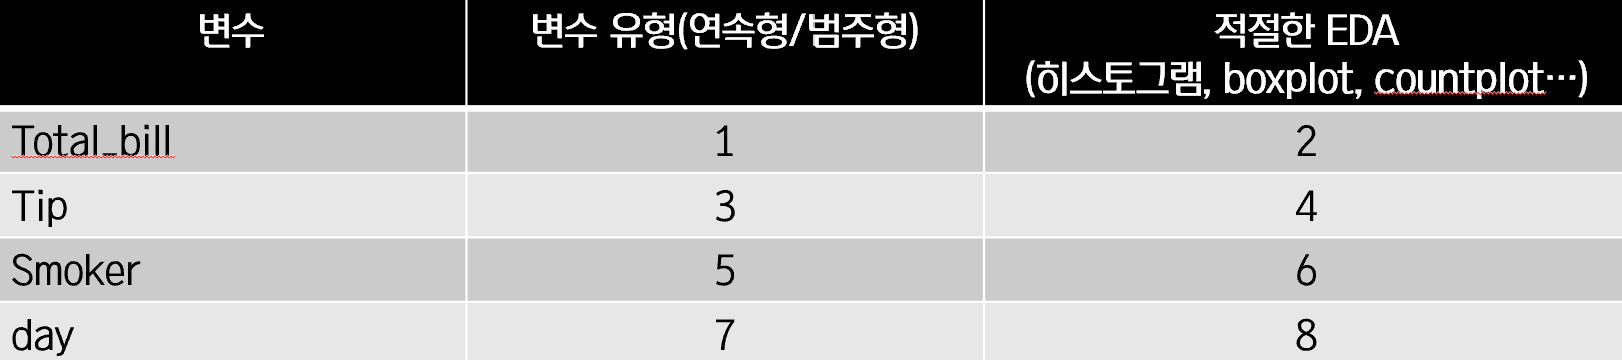


1: total_bill / 연속형 / 히스토그램(histplot)

2: tip / 연속형 / 히스토그램(histplot)

3: sex / 범주형 / countplot

4: smoker / 범주형 / countplot

5: day / 범주형 / countplot

6: time / 범주형 / countplot

Q1. total_bill 분포가 오른쪽으로 치우치면 분석 또는 모델링에 어떤 문제가 생기는지 간략히 설명하세요.





답안: total_bill 분포가 오른쪽으로 치우치면, 평균이 중앙값보다 커지면서 평균 기반 통계량이 대표성을 잃게 된다. 또한 선형 회귀 등의 모델에서는 회귀 계수 추정의 신뢰도가 떨어지고, 극단적으로 큰 값들이 모델의 학습에 과도한 영향을 미쳐 예측 성능이 저하될 수 있다.

Q2. total_bill과 tip을 산점도로 그렸을 때 양의 관계가 보인다면 이것이 의미하는 바가 무엇인지 쓰세요.

답안: total_bill과 tip 사이에 양의 관계가 보인다는 것은, 식사 금액이 클수록 팁 금액도 함께 증가하는 경향이 있음을 의미한다. 즉, 고객들이 팁을 결정할 때 식사 금액에 비례하여 지불하는 경향이 있으며, total_bill이 tip의 주요 예측 변수가 될 수 있음을 시사한다.

Q3. Boxplot에서 극단적으로 큰 total_bill 값이 관측되었다고 할 때,
아래 중 가장 적절하다고 생각하는 방법 1개를 선택하고 이유를 쓰세요.

① 삭제

② 로그 변환

③ 그대로 둔다

답안 : ② 로그 변환

이유 : 극단적으로 큰 total_bill 값을 단순히 삭제하면 실제 존재하는 유의미한 데이터를 잃게 되고, 그대로 두면 평균과 회귀 모델에 과도한 영향을 미친다. 로그 변환은 큰 값의 스케일을 압축하여 분포를 정규분포에 가깝게 만들면서도 데이터를 보존할 수 있으므로, 오른쪽으로 치우친 total_bill 분포에 가장 적절한 처리 방법이라고 생각했다.

# 문제 2) Tips 데이터셋에 대한 EDA 파이프라인을 완성하세요.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
(244, 7)
duplicates: 1
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


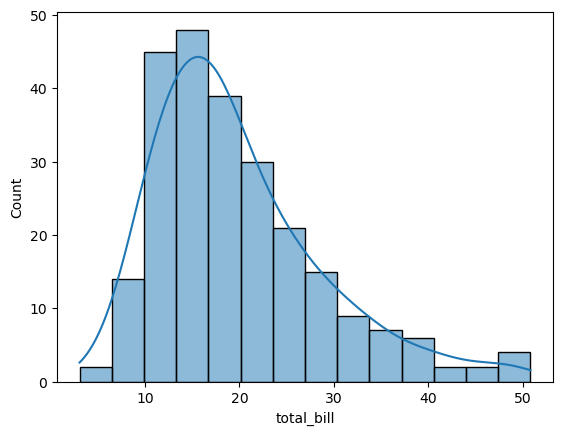

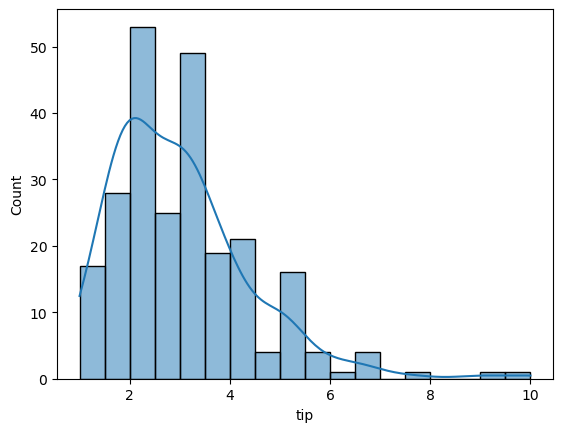

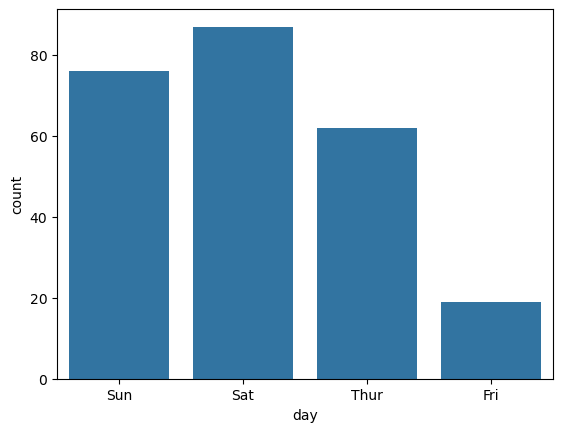

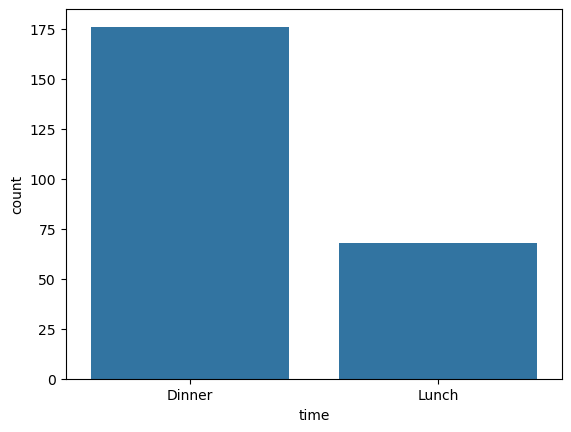

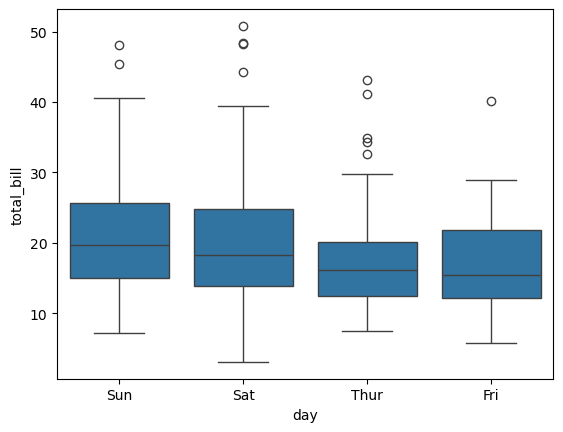

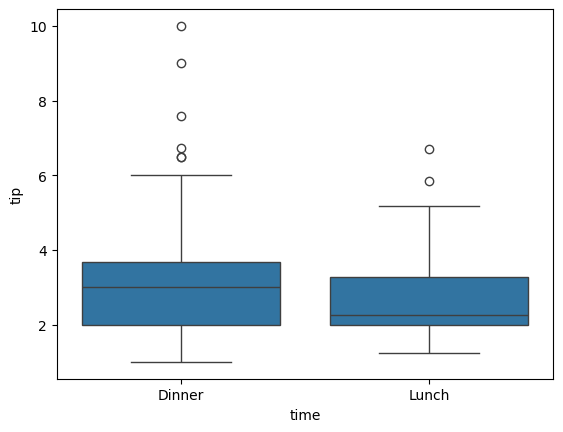

           mean  median  count
day                           
Sun   21.410000   19.63     76
Sat   20.441379   18.24     87
Thur  17.682742   16.20     62
Fri   17.151579   15.38     19


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("tips.csv")

# 1) 구조/요약 확인
df.head()
df.info()
print(df.shape)

# 2) 중복행 확인 및 개수 출력
dup_cnt = df.duplicated().sum()
print("duplicates:", dup_cnt)

# 3) 결측치 확인 (변수별 결측 개수)
miss = df.isnull().sum()
print(miss)

# 4) 연속형 분포 확인: total_bill, tip (히스토그램 2개)
sns.histplot(data=df, x="total_bill", kde=True)
plt.show()

sns.histplot(data=df, x="tip", kde=True)
plt.show()

# 5) 범주형 빈도 확인: day, time (countplot 2개)
sns.countplot(data=df, x="day")
plt.show()

sns.countplot(data=df, x="time")
plt.show()

# 6) 범주별 연속형 비교: day별 total_bill / time별 tip (boxplot 2개)
sns.boxplot(data=df, x="day", y="total_bill")
plt.show()

sns.boxplot(data=df, x="time", y="tip")
plt.show()

# 7) 그룹 통계표: day별 total_bill의 평균/중앙값/개수
summary = df.groupby("day")["total_bill"].agg(["mean", "median", "count"]).sort_values(by="mean", ascending=False)
print(summary)

(1) 위 EDA 결과에서 표본이 가장 많은 요일은 무엇인가요?



답안 : Saturday로 87건이 가장 많다.

(2) boxplot을 보고 total_bill이 상대적으로 큰 요일 1개를 고르고 그것이 무엇을 뜻하는지 설명하세요.

답안 : Sunday이다. Boxplot에서 일요일의 중앙값과 사분위 범위가 다른 요일보다 높게 나타나며, 이는 일요일에 방문하는 고객들이 상대적으로 더 높은 금액의 식사를 하는 경향이 있음을 의미한다. 주말 브런치나 가족 외식 등 일요일 특유의 식사 패턴이 반영된 결과로 해석할 수 있다.

# 문제 3)

(1) 아래 조건에 맞는 코드를 직접 만들어주세요.(자유형)

1. tip_pct 생성

- tip_pct는 계산금액(total_bill) 대비 팁(tip)의 비율로, 손님들의 ‘팁 성향’을 금액 규모와 무관하게 비교하기 위한 지표입니다.

2. 아래 시각화 코드를 각각 작성

- tip_pct 분포

- smoker별 tip_pct boxplot

- time별 tip_pct boxplot

- day별 tip_pct boxplot



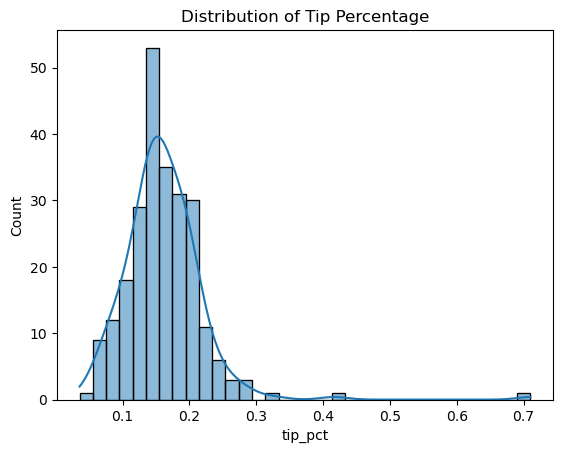

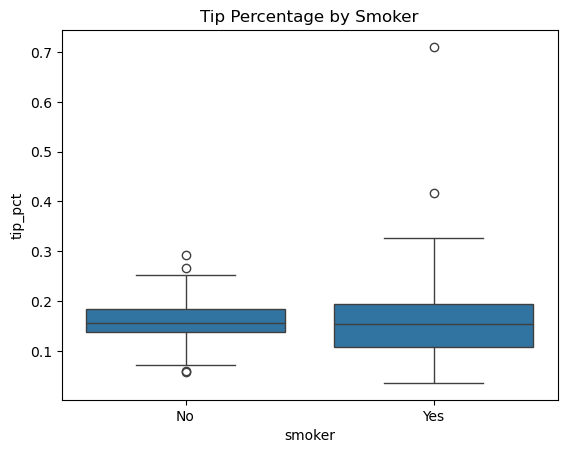

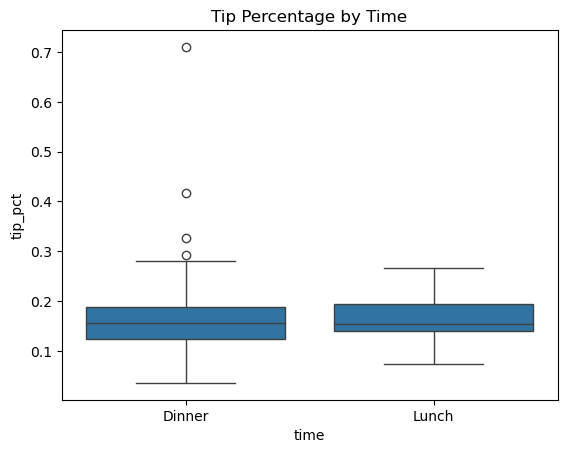

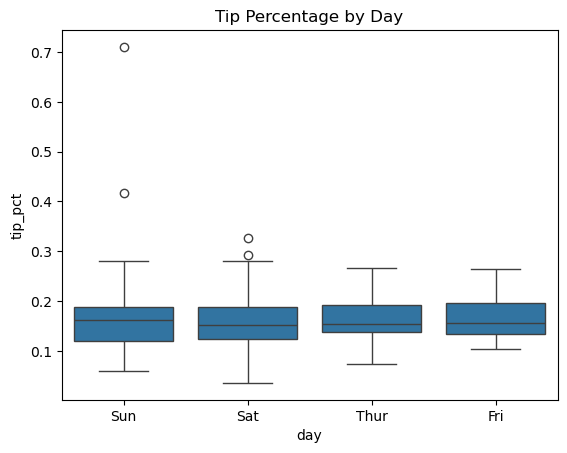

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("tips.csv")

# 1) tip_pct 만들기
df["tip_pct"] = df["tip"] / df["total_bill"]

# 2) 시각화 코드 작성

# - tip_pct 히스토그램 분포
sns.histplot(data=df, x="tip_pct", kde=True)
plt.title("Distribution of Tip Percentage")
plt.show()

# - smoker별 tip_pct boxplot
sns.boxplot(data=df, x="smoker", y="tip_pct")
plt.title("Tip Percentage by Smoker")
plt.show()

# - time별 tip_pct boxplot
sns.boxplot(data=df, x="time", y="tip_pct")
plt.title("Tip Percentage by Time")
plt.show()

# - day별 tip_pct boxplot
sns.boxplot(data=df, x="day", y="tip_pct")
plt.title("Tip Percentage by Day")
plt.show()

(2) 결론 도출 (서술형)

Q1. 둘 중 적절한 것을 고르세요.

- "EDA 결과, 팁 비율이 상대적으로 높은 그룹은 (Lunch), (Smoker) 이다."

Lunch 그룹의 평균 tip_pct(약 16.4%)가 Dinner(약 15.9%)보다 높고, Smoker 그룹의 평균 tip_pct(약 16.3%)가 Non-Smoker(약 15.9%)보다 소폭 높다.

Q2. 빈칸에 적절한 말을 자유롭게 서술하세요.

- "이를 통해 레스토랑 운영자는 **런치 타임에 대한 프로모션을 강화하거나, 흡연 구역 고객에 대한 서비스 품질 유지를 통해 팁 수익을 극대화하는** 전략을 고려할 수 있다."